# PREDICTING HEART DISEASE USING MACHINE LEARNING

This notebook looks into various Python based- ML and DS libraries in an attempt to build a machine learning model capable of predicting whether or not someone has a heart disease based on their medical attributes.  

We're going to follow this approach:
1. Problem definition 
2. Data
3. Evaluation 
4. Features 
5. Modelling
6. Experimentation

# 1. Problem definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?


# 2. Data

The original data came from Cleavland data from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Heart+Disease/

There is also a version of it available on Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci


# 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.


# 4. Features

This is where you'll get different information about each of the features in the data.

**Create a data dictionary**

* age in years
* sex (1 = male; 0 = female)
* cp: chest pain type (4 values)
* trestbps: resting blood pressure
* chol: serum cholestoral in mg/dl
* fbs: fasting blood sugar > 120 mg/dl
* restecg: resting electrocardiographic results (values 0,1,2)
* thalach: maximum heart rate achieved
* exang: exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target = 0 or 1 

# Preparing the tools 

We're going to Pandas, Numpy and Matplotlib, for data analysis and manipulation. 

In [2]:
# Import all the tools we need 

# Regular EDA (exploratory data analysis) and plotting libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 
# Plots would appear inside the notebook

# Models from Sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve

# Load Data

In [5]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the data set you're working with it.

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What is missing from the data and how to deal with it?
4. Where are the outliers and why should we care about them?
5. How can you add, change or remove features to get more out of given data?

In [10]:
df["target"].value_counts() # Find how many of each class are there 

1    165
0    138
Name: target, dtype: int64

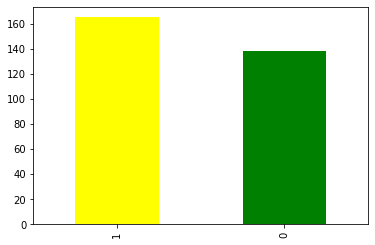

In [27]:
df["target"].value_counts().plot(kind="bar", color=["yellow", "green"]);

In [14]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart Disease Frequency according to sex

In [16]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [17]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


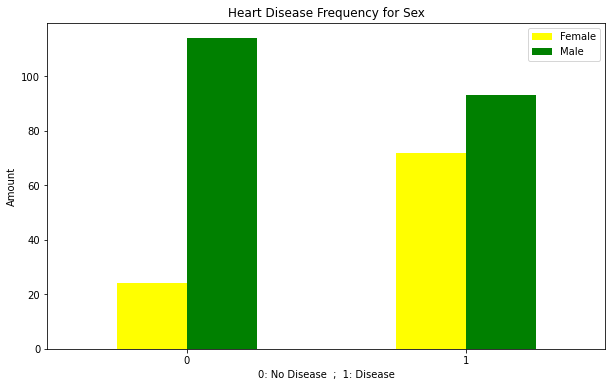

In [26]:
# Create a plot of the crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",figsize=(10,6), color=["yellow","green"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0: No Disease  ;  1: Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

# Age vs Max Heart Rate for Heart Disease

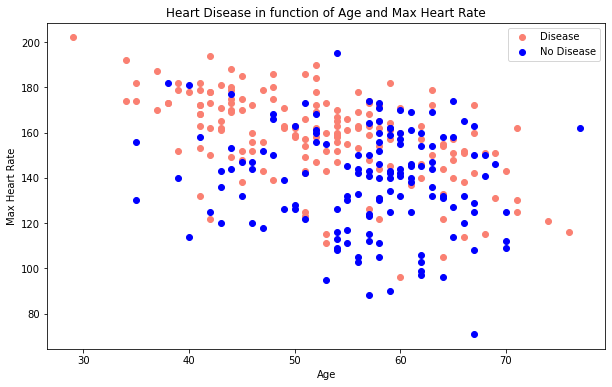

In [28]:
# Create another figure 
plt.figure(figsize=(10,6))

# Scatter with positive examples 
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color=["salmon"])

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
             df.thalach[df.target==0],
             color="blue")

# Adding info about theh plot
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

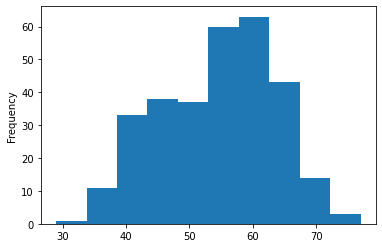

In [30]:
# Check the distribution of the age column with a histogram 
df.age.plot.hist();

# Heart Disease Frequency per Chest Pain Type

**Types of Chest Pain:**
    
0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart 

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

In [31]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


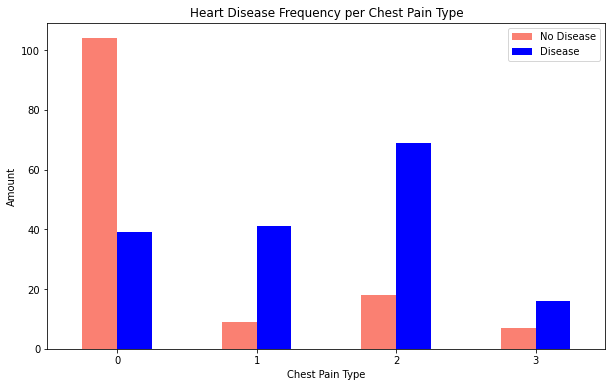

In [33]:
# Plotting the crosstab
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["salmon","blue"])

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

# Make a correlation matrix

In [34]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


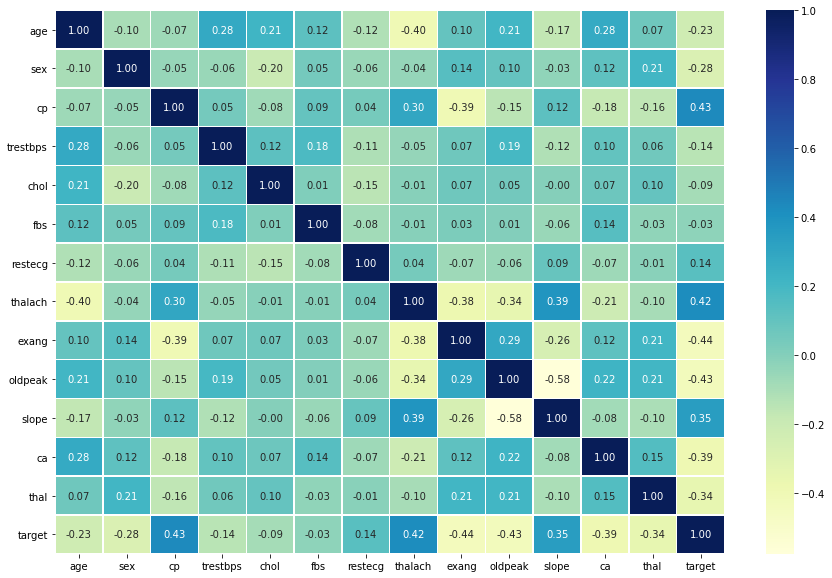

In [36]:
# Making our correlation matrix more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");

# 5. Modelling 

In [6]:
# Split into X and y
X = df.drop(["target"], axis=1)
y = df["target"]

# Split into Training and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now that we have our data split into training and test sets, we can build a machine learning model 

We'll train it (find the patterns) on the training set.

And test it (use the patterns) on the test set.

We're going to try 3 different ML models:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier 
3. Random Forest Classifier 

In [7]:
# Put models in a dictionary 
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "RandomForestClassifier": RandomForestClassifier()}

In [8]:
# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given ML models.
    models: a dict of different sklearn ML models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: tetsing labels
    """
    # Setup a random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through the models
    for name, model in models.items():
        # Fit the model to the data 
        model.fit(X_train, y_train)
        # Evaluate the model and append it to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [9]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\rhari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

# Model Comparision 

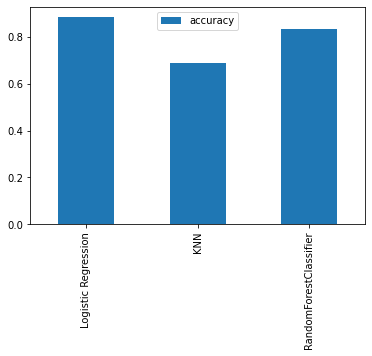

In [11]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model. We know a model's first predictions aren't always what we should based our nesxt steps off. What to do?

Let's look at the following:
* Hyperparameter Tuning 
* Feature Importance
* Confusion matrix
* Cross-Validation
* Precision
* Recall
* F1 score
* Classification report 
* ROC curve 
* Area under the curve (AUC)

# Hyperparameter Tuning

In [10]:
# Let's tune with KNN
train_scores = []
test_scores = []

# Create a list of different values for n-neighbors 
neighbors = range(1, 21)

# Setup KNN instance 
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [21]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [22]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


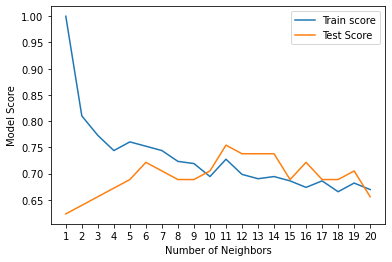

In [11]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.xticks(np.arange(1, 21, 1))
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%");

# Hyperparameter Tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()  
* RandomForestClassifier()

...using RandomizedSeachCV

In [12]:
# Create a hyperparameter grid for Logistic Regression 
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,5000,50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now that we have our grids let's tune them using RandomizedSearchCV.

In [13]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                param_distributions=log_reg_grid,
                                cv=5, n_iter=20, verbose=True)

# Fit random hyperparameter search model for LR
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [14]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [15]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [ ]:
# Tune RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression 
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5, n_iter=20, verbose=True)

# Fit random hyperparameter search model for LR
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
rs_rf.best_params_

In [ ]:
rs_rf.score(X_test, y_test)

# Hyperparameter Tuning with GridSearchCV

Since our Logistic Regression model  provides the best scores so far, we'll try to improve it using GridSearchCV

In [ ]:
# Different hyperparamerters gird for our Logistic Regression model

np.random.seed(42)
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                           param_grid=log_reg_grid,
                           cv=5, verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train) 

In [34]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [35]:
gs_log_reg.score(X_train, y_train)

0.859504132231405

# Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1 score

And it would be great to used Cross-Validation anywhere possible.

To make comparisions and evaluate our trained model first we need to make predictions.

In [36]:
# Make predictions
y_preds = rs_log_reg.predict(X_test)

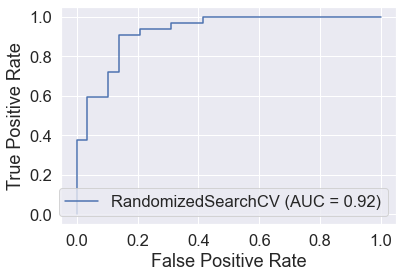

In [37]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_log_reg, X_test, y_test);

In [38]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


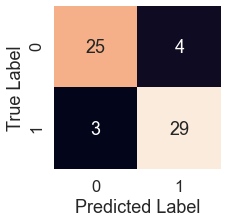

In [39]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plot_conf_mat(y_test, y_preds)

Now, we'vw got a ROC curve, an AUC metric and a confusion matrix. Let's get a classification report and cross-validated precision, recall and f1 score.

In [40]:
print(classification_report(y_test, y_preds)) # On one set of test dara, so we break the dataset into 3 sets different for each fold and use cross validation

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Calculate evaluation matrix using Cross-Validataion

We're going to calculate precision, recall, f1 score of our model using cross-validation and to do so we'll be using 'cross_val_score()'.

In [41]:
# Check best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [42]:
# Create a new classifier with best parameters
clf = LogisticRegression(C= 0.23357214690901212,
                         solver="liblinear") 

In [46]:
# Cross-validated Accuracy 
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [47]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [48]:
# Cross-validated Precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [49]:
# Cross-validated Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [50]:
# Cross-validated F1 score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

In [52]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1 score": cv_f1}, index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1 score
0,0.847978,0.821587,0.927273,0.87054


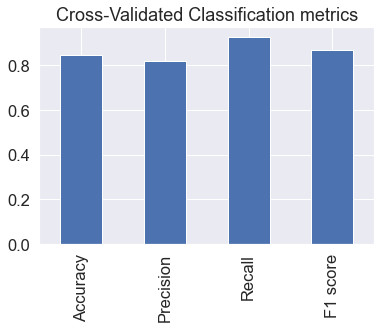

In [55]:
cv_metrics.T.plot.bar(title="Cross-Validated Classification metrics", legend=False);

# Feature Importance 

Feature Importance is another as asking, "which features contributed most to the coutcomes of the model and how?"

Finding Feature importance is different for each machine learning model. 
One way to find it, is to search "Model Name Feature Importance".

Let's find feature important for our Logistic Regression model.

In [58]:
# Fit an instance of LogisticRegression
rs_log_reg.best_params_
clf = LogisticRegression(C=0.23357214690901212, solver="liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [59]:
# Check coef_
clf.coef_ # how each of the independent variables(X_train dataset) the coefficient contributes to our y labels

array([[ 0.00369922, -0.90424089,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490194,  0.02472938, -0.63120405, -0.57590939,
         0.47095134, -0.65165349, -0.69984206]])

In [60]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003699220218693,
 'sex': -0.9042408909021112,
 'cp': 0.6747282639169492,
 'trestbps': -0.01161340193177967,
 'chol': -0.001703644306964925,
 'fbs': 0.047876883381437196,
 'restecg': 0.33490194499930287,
 'thalach': 0.024729383642503815,
 'exang': -0.6312040482089574,
 'oldpeak': -0.5759093926828687,
 'slope': 0.470951337854335,
 'ca': -0.651653485595126,
 'thal': -0.6998420593767237}

<AxesSubplot:title={'center':'Feature Importance'}>

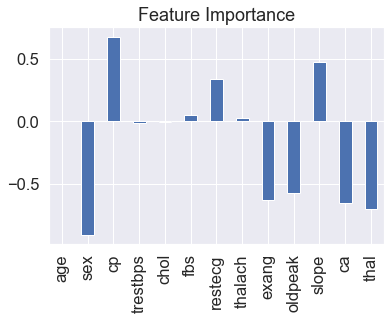

In [61]:
# Visualize feature importance 
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

In [62]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [63]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope: the slope of the peak exercise ST segment
* Value 0: upsloping: better heart rate with excercise (uncommon)
* Value 1: flat: minimal change (typically healthy heart)
* Value 2: downsloping: signs of unhealthy heart